In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def partition(number):
    answer = set()
    answer.add((number, ))
    for x in range(1, number):
        for y in partition(number - x):
            answer.add(tuple(sorted((x, ) + y)))
    return answer

def all_partitions_below(number):
    answer = set()
    answer.add((number, ))
    for x in range(1, number):
        partition_lower = all_partitions_below(number - x)
        answer = answer.union(partition_lower)
        for y in partition_lower:
            answer.add(tuple(sorted((x, ) + y)))
    return answer

def non_trivial_partitions(n):
    all_partitions = all_partitions_below(n)
    for i in range(1, n + 1):
        all_partitions.remove((i,))
        pn = sorted(list(all_partitions), key=lambda part: np.sum(part))
    return pn

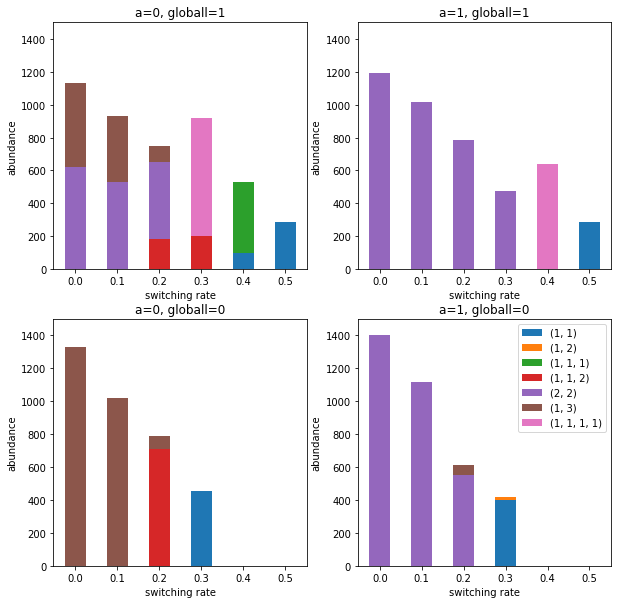

In [22]:
n = 4
modes = non_trivial_partitions(n)
nmodes = len(modes)
nreps = 10
ms = [0,0.1,0.2,0.3,0.4,0.5]
As = [0,1]
globalls = [0,1]

fig, axs = plt.subplots(2,2, figsize=(10,10))

for a in As:
    for globall in globalls:

        mcounts = []
        for m in ms:
            counts = []
            for rep in range(nreps):
                _,mos,_ = np.load('data/sim_n%d_m%s_globall%d_a%d_rep%d.npy' %(n,m,globall,a,rep))
                counts.append([np.sum(mos==i) for i in range(nmodes+1)])
            mcounts.append(np.mean(counts, axis=0))
        mcounts = np.array(mcounts)
        
        bottom = np.zeros(len(ms))
        ax = axs[1-globall,a]
        for i in range(nmodes):
            ax.bar(ms, mcounts[:,i+1], bottom=bottom, width=0.05, label=modes[i])
            bottom += mcounts[:,i+1]
        ax.set_xlabel('switching rate')
        ax.set_ylabel('abundance')
        ax.set_title('a=%d, globall=%d' %(a,globall))
        ax.set_ylim(0,1500)

plt.legend()
plt.show()

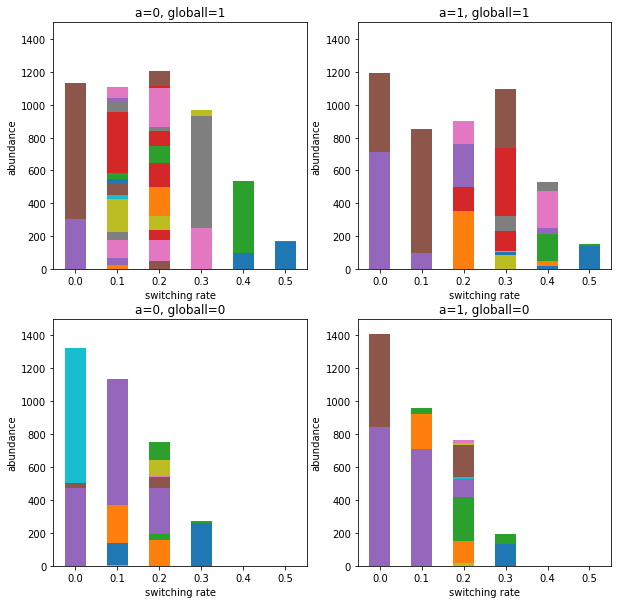

In [21]:
n = 10
modes = non_trivial_partitions(n)
nmodes = len(modes)
nreps = 10
ms = [0,0.1,0.2,0.3,0.4,0.5]
As = [0,1]
globalls = [0,1]

fig, axs = plt.subplots(2,2, figsize=(10,10))

for a in As:
    for globall in globalls:

        mcounts = []
        for m in ms:
            counts = []
            for rep in range(nreps):
                _,mos,_ = np.load('data/sim_n%d_m%s_globall%d_a%d_rep%d.npy' %(n,m,globall,a,rep))
                counts.append([np.sum(mos==i) for i in range(nmodes+1)])
            mcounts.append(np.mean(counts, axis=0))
        mcounts = np.array(mcounts)
        
        bottom = np.zeros(len(ms))
        ax = axs[1-globall,a]
        for i in range(nmodes):
            ax.bar(ms, mcounts[:,i+1], bottom=bottom, width=0.05, label=modes[i])
            bottom += mcounts[:,i+1]
        ax.set_xlabel('switching rate')
        ax.set_ylabel('abundance')
        ax.set_title('a=%d, globall=%d' %(a,globall))
        ax.set_ylim(0,1500)

# plt.legend()
plt.show()